# Stock Next Day Closing Price Predictor
### Predicts and Compares Actual Next Day Closing Price
#### **Daniel Hodges, Kush Patel, Robert King**

- FUTURE: Implement a way to check specific date to further test

In [67]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [68]:
# Random_state and Test_size Set Variables
RANDOMSTATE = 24 # NOTICE: Haven't decided if it is a good idea to keep constant seed
TESTSIZE = 0.001

In [69]:
# Load berkshire_hathaway_data CSV from github
url = "https://raw.githubusercontent.com/RobKing2003/StockPrediction/refs/heads/main/berkshire_hathaway_data.csv" 
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])

In [70]:
# Preprocess Data
data['Next_Day_Close'] = data['Close'].shift(-1)
data = data.dropna()
X = data[['Open', 'Close', 'High', 'Low', 'Volume']]
y = data['Next_Day_Close']

In [71]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TESTSIZE, random_state=RANDOMSTATE, shuffle=False)

In [72]:
# Train Model (RANDOM FOREST REGRESSION)
model = RandomForestRegressor(n_estimators=100, random_state=RANDOMSTATE)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=24)

In [73]:
# Predict Model
y_pred = model.predict(X_test)

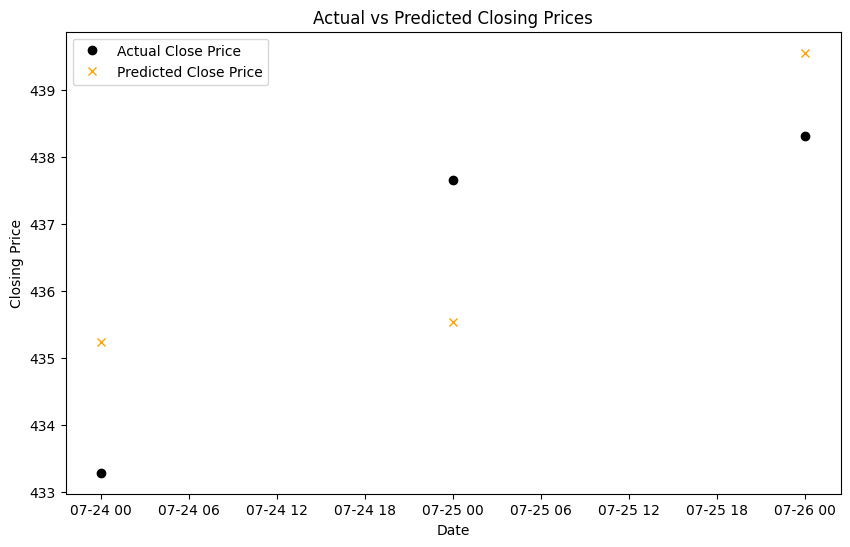

In [74]:
# Plot Accuracy Date for Visualization
plt.figure(figsize=(10,6))
dates_test = data['Date'].iloc[y_test.index]

plt.plot(dates_test, y_test.values, label='Actual Close Price', color='black', marker='o', linestyle='None')
plt.plot(dates_test, y_pred, label='Predicted Close Price', color='orange', marker='x', linestyle='None')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

In [75]:
# Predicted VS Actual CSV Export (Predicted_VS_Actual.csv)
results_df = pd.DataFrame({
        'Date': data['Date'].iloc[y_test.index],
        'Current_Close': data['Close'].iloc[y_test.index],
        'Actual_Next_Day_Close': y_test,
        'Predicted_Next_Day_Close': y_pred
    })

# Predicted Cost
results_df['Predicted_Trend'] = results_df.apply(
        lambda row: 'Uptrend' if row['Predicted_Next_Day_Close'] > row['Current_Close'] else 'Downtrend', axis=1
    )

# Actual Cost
results_df['Actual_Trend'] = results_df.apply(
    lambda row: 'Uptrend' if row['Actual_Next_Day_Close'] > row['Current_Close'] else 'Downtrend', axis=1
)

# Prediction Percentage Difference
results_df['Prediction_Difference'] = round((results_df['Predicted_Next_Day_Close'] - results_df['Actual_Next_Day_Close']) / results_df['Actual_Next_Day_Close'] * 100, 2)

# Sort CSV by date
results_df = results_df.sort_values(by='Date')

# Export CSV
results_df.to_csv("Predicted_VS_Actual.csv", index=False)

In [76]:
# Add a feature to check stock movement by date in a loop
def check_stock_movement_by_date():
    while True:
        try:
            # Ask the user for a date
            date_input = input("Enter a date (YYYY-MM-DD) or type 'exit' to quit: ")

            # Exit condition
            if date_input.lower() == 'exit':
                print("Exiting the program.")
                break

            # Convert input to datetime
            user_date = pd.to_datetime(date_input)

            # Search for the date in the results DataFrame
            result = results_df[results_df['Date'] == user_date]

            if not result.empty:
                # Fetch predicted and actual trends
                predicted_trend = result['Predicted_Trend'].values[0]
                actual_trend = result['Actual_Trend'].values[0]
                prediction_diff = result['Prediction_Difference'].values[0]

                # Display the information
                print(f"\nDate: {user_date.strftime('%Y-%m-%d')}")
                print(f"Predicted Movement: {predicted_trend}")
                print(f"Actual Movement: {actual_trend}")
                print(f"Prediction Difference: {prediction_diff}%")
            else:
                print("The date entered is not available in the dataset.")

        except Exception as e:
            print("An error occurred. Please ensure the date is entered correctly (YYYY-MM-DD).")
            print("Error:", e)

# Call the function to test
check_stock_movement_by_date()

Exiting the program.
